In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import geopandas as gpd
import matplotlib.pyplot as plt

# Importing and viewing shapefiles

Read a file:

In [2]:
districts = gpd.read_file(r'Shapefiles\districts.shp')

View geodataframe:

In [3]:
districts.head()

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."


Plot districts:

<AxesSubplot:>

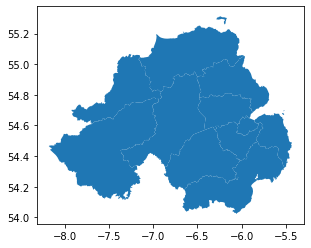

In [4]:
districts.plot()

<AxesSubplot:>

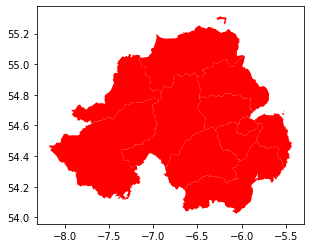

In [5]:
districts.plot(color = 'red')

<AxesSubplot:>

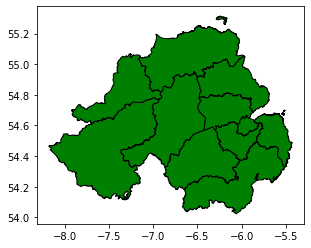

In [6]:
districts.plot(color='green',edgecolor='black')

Different colors based on columns:

<AxesSubplot:>

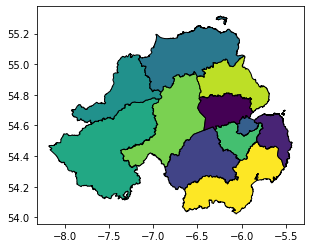

In [7]:
districts.plot(cmap='viridis',edgecolor='black',column='district')

# Plot multiple shapefiles

In [8]:
area_of_interest = gpd.read_file(r'Shapefiles\area_of_interest.shp')

<AxesSubplot:>

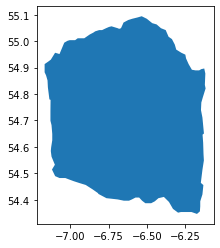

In [9]:
area_of_interest.plot()

<AxesSubplot:>

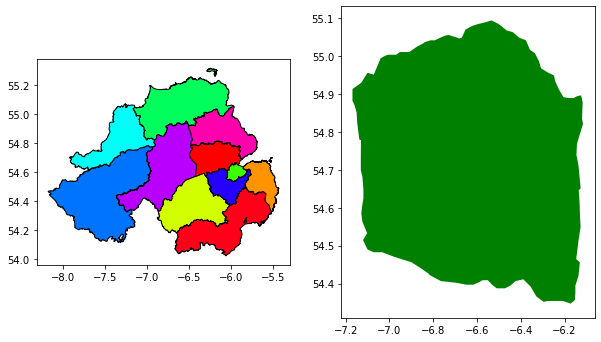

In [10]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,8))
districts.plot(ax=ax1,cmap='hsv',edgecolor='black',column='district')
area_of_interest.plot(ax=ax2,color='green')

Layers:

<AxesSubplot:>

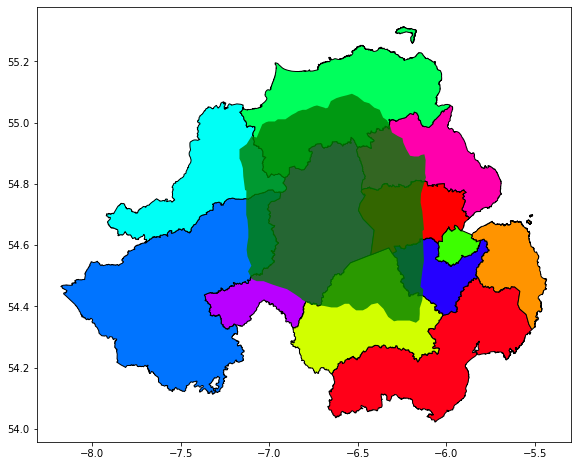

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
districts.plot(ax=ax,cmap='hsv',edgecolor='black',column='district')
area_of_interest.plot(ax=ax,color='green',alpha=0.8)


<AxesSubplot:>

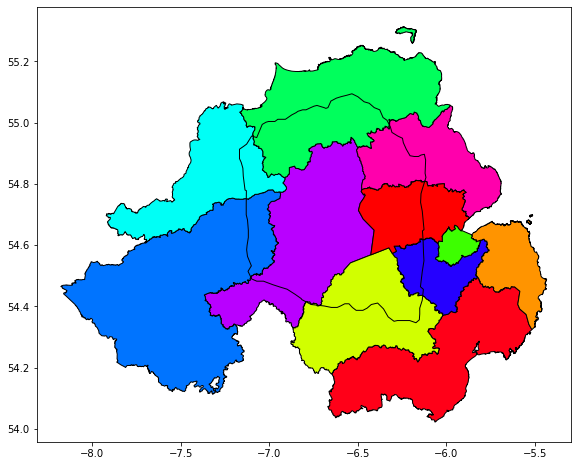

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
districts.plot(ax=ax,cmap='hsv',edgecolor='black',column='district')
area_of_interest.plot(ax=ax,color='none',edgecolor='black')


In [13]:
atms = gpd.read_file(r'Shapefiles\atms.shp')
atms.head()

,operator,geometry
0,Northern Bank,MULTIPOINT (-6.65841 54.50122)
1,None,MULTIPOINT (-6.22666 54.72956)
2,Bank of Ireland,MULTIPOINT (-6.22038 54.80819)
3,None,MULTIPOINT (-6.29858 54.43323)
4,None,MULTIPOINT (-6.21401 54.59141)


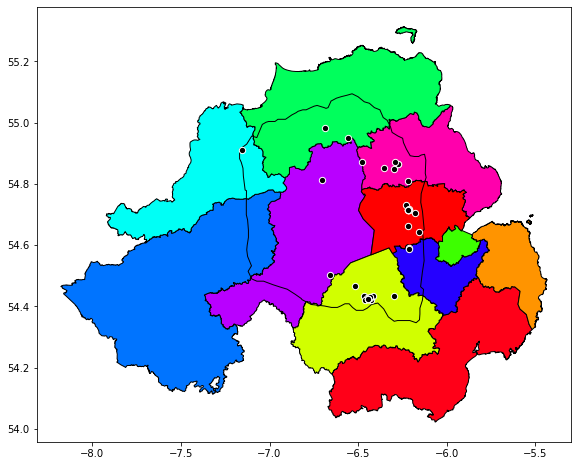

<Figure size 432x288 with 0 Axes>

In [14]:
atms.plot(ax=ax,color='black',markersize=40,edgecolor='white')
fig

## Check Coordinates System

In [15]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

type EPSG:4326 into google: WGS 1984 system

In [16]:
area_of_interest.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
atms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Different Coordinate Systems

In [18]:
districts_32629 = districts.to_crs(epsg=32629)
area_of_interest_32629 = area_of_interest.to_crs(epsg=32629)
atms_32629 = atms.to_crs(epsg=32629)

<AxesSubplot:>

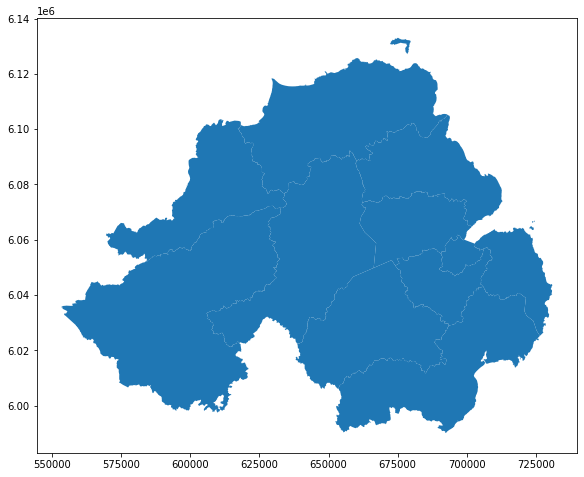

In [19]:
districts_32629.plot(figsize=(10,8))

## Intersecting Layers

<AxesSubplot:>

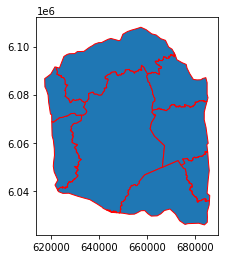

In [20]:
districts_in_aoi = gpd.overlay(districts_32629,area_of_interest_32629,how='intersection')
districts_in_aoi.plot(edgecolor='red')

calculate areas:

In [21]:
districts_in_aoi['area'] = districts_in_aoi.area
districts_in_aoi.head()

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6...",1.574420e+09
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6...",3.736911e+08
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6...",1.517379e+08
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((643174.064 6031990.247, 643202...",5.539328e+08
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6...",4.628229e+08


currently in sq meters

In [22]:
districts_in_aoi['area'] = districts_in_aoi['area']/1000000
districts_in_aoi.head()

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6...",1574.420076
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6...",373.691057
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6...",151.737874
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((643174.064 6031990.247, 643202...",553.932816
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6...",462.822918


now in sq kms

## Export Files

In [23]:
districts_in_aoi.to_file('districts_intersect.shp',driver='ESRI Shapefile')

## Kepler.gl visuals

In [24]:
import keplergl as kp

kep_map = kp.KeplerGl(height=500)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [25]:
kep_map.add_data(data=districts,name='districts')
kep_map.add_data(data=area_of_interest,name='aoi')
kep_map.add_data(data=atms,name='atms')

In [26]:
kep_map

KeplerGl(data={'districts': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'columns': ['district', 'geometry'],…